# K-means Clustering 


在这个练习中，您将实现K均值算法，并将其用于图像压缩。

* 您将从一个样本数据集开始，以帮助您获得K均值算法的直觉
* 然后，您将使用K均值算法进行图像压缩，通过将出现在图像中最常见的颜色的数量减少到仅这些颜色，来减少图像中出现的颜色数量。




# Outline
- [ 1 - Implementing K-means](#1)
  - [ 1.1 Finding closest centroids](#1.1)
    - [ Exercise 1](#ex01)
  - [ 1.2 Computing centroid means](#1.2)
    - [ Exercise 2](#ex02)
- [ 2 - K-means on a sample dataset ](#2)
- [ 3 - Random initialization](#3)
- [ 4 - Image compression with K-means](#4)
  - [ 4.1 Dataset](#4.1)
  - [ 4.2 K-Means on image pixels](#4.2)
  - [ 4.3 Compress the image](#4.3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

<a name="1"></a>
## 1 - 实现K均值算法

K均值算法是一种自动将相似数据点聚集在一起的方法。
data points together. 

* 具体来说，给定一个训练集${x^{(1)}, …, x^{(m)}}$，您希望将数据分为几个连贯的“簇”。


* K均值是一个迭代过程，它：
     * 首先猜测初始质心，然后
     * 通过
         * 反复将示例分配给它们最近的质心，然后
         * 根据分配重新计算质心来细化这个猜测。
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_means(X, idx, K)
    ```


* 算法的内部循环反复执行两个步骤：
    * (i) 将每个训练示例 $x^{(i)}$ 分配给其最近的质心，和
    * (ii) 使用分配给它的点重新计算每个质心的平均值。
    
    
* $K$-均值算法将始终收敛到某些质心的最终均值集合。

* 然而，收敛的解决方案可能并不总是理想的，这取决于质心的初始设置。
    * 因此，在实践中，K均值算法通常使用不同的随机初始化运行几次。
    * 选择来自不同随机初始化的这些不同解决方案之一的一种方法是选择具有最低成本函数值（失真）的解决方案。

在下一节中，您将单独实现K均值算法的两个阶段。
* 您将首先完成`find_closest_centroid`，然后继续完成`compute_centroids`。

<a name="1.1"></a>
### 1.1 寻找最近的质心

在K均值算法的“簇分配”阶段中，给定质心的当前位置，算法将每个训练示例$x^{(i)}$分配给其最近的质心。

<a name="ex01"></a>
### Exercise 1

您的任务是完成`find_closest_centroids`中的代码。
* 这个函数接受数据矩阵`X`和所有质心位置在`centroids`中的位置。
* 它应该输出一个一维数组`idx`（它具有与`X`相同的元素数），它保存每个训练示例最近质心的索引（${1,…,K}$中的值，其中$K$是质心的总数）。
* 具体来说，对于每个示例$x^{(i)}$，我们设置
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
其中 
 * $c^{(i)}$是最接近$x^{(i)}$的质心的索引（对应于起始代码中的`idx[i]`）
 * $\mu_j$是第$j$个质心的位置（值）（在起始代码中存储在`centroids`中）。
 * 
如果您遇到困难，可以在下面的单元格后面查看提示，以帮助您实现代码。

In [10]:
# UNQ_C1
# GRADED FUNCTION: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
        distance = []
        for j in range(K):
            distance.append(np.sum((X[i] - centroids[j])**2))
        # distance_i = (X[i] - centroids[i])**2
        idx[i] = np.argmin(distance)
    ### END CODE HERE ###
    
    return idx

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* Here's how you can structure the overall implementation for this function
    ```python 
    def find_closest_centroids(X, centroids):
    
        # Set K
        K = centroids.shape[0]
    
        # You need to return the following variables correctly
        idx = np.zeros(X.shape[0], dtype=int)
    
        ### START CODE HERE ###
        for i in range(X.shape[0]):
            # Array to hold distance between X[i] and each centroids[j]
            distance = [] 
            for j in range(centroids.shape[0]):
                norm_ij = # Your code to calculate the norm between (X[i] - centroids[j])
                distance.append(norm_ij)
            
            idx[i] = # Your code here to calculate index of minimum value in distance
        ### END CODE HERE ###
        return idx
    ```
  
    If you're still stuck, you can check the hints presented below to figure out how to calculate `norm_ij` and `idx[i]`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate norm_ij</b></font></summary>
           &emsp; &emsp; You can use <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html">np.linalg.norm</a> to calculate the norm 
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate norm_ij</b></font></summary>
               &emsp; &emsp; You can compute norm_ij as <code>norm_ij = np.linalg.norm(X[i] - centroids[j]) </code>
           </details>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate idx[i]</b></font></summary>
          &emsp; &emsp; You can use <a href="https://numpy.org/doc/stable/reference/generated/numpy.argmin.html">np.argmin</a> to find the index of the minimum value
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate idx[i]</b></font></summary>
              &emsp; &emsp; You can compute idx[i] as <code>idx[i] = np.argmin(distance)</code>
          </details>
    </details>
        
    </details>

</details>

    


Now let's check your implementation using an example dataset

In [11]:
# Load an example dataset that we will be using
X = load_data()

The code below prints the first five elements in the variable `X` and the dimensions of the variable

In [12]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [13]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST
from public_tests import *

find_closest_centroids_test(find_closest_centroids)


First three elements in idx are: [0 2 1]
All tests passed!


**Expected Output**:
<table>
  <tr>
    <td> <b>First three elements in idx are<b></td>
    <td> [0 2 1] </td> 
  </tr>
</table>

<a name="1.2"></a>
### 1.2 计算质心均值

给定每个点到质心的分配，算法的第二阶段重新计算每个质心被分配到的点的平均值。


<a name="ex02"></a>
### Exercise 2

请完成下面的 `compute_centroids` 函数以重新计算每个质心的值：

* 具体而言，对于每个质心 $\mu_k$，我们设置
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ 是分配给质心 $k$ 的样本集合
    * $|C_k|$ 是集合 $C_k$ 中的样本数量


* 具体来说，如果两个样本 $x^{(3)}$ 和 $x^{(5)}$ 被分配给质心 $k=2$，
则您应该更新 $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$。

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [14]:
# UNQ_C2
# GRADED FUNCTION: compute_centpods

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for i in range(K):
        centroids[i] = np.mean(X[idx == i], axis=0)
    ### END CODE HERE ## 
    
    return centroids

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* Here's how you can structure the overall implementation for this function
    ```python 
    def compute_centroids(X, idx, K):
        # Useful variables
        m, n = X.shape
    
        # You need to return the following variables correctly
        centroids = np.zeros((K, n))
    
        ### START CODE HERE ###
        for k in range(K):   
            points = # Your code here to get a list of all data points in X assigned to centroid k  
            centroids[k] = # Your code here to compute the mean of the points assigned
    ### END CODE HERE ## 
    
    return centroids
    ```
  
    If you're still stuck, you can check the hints presented below to figure out how to calculate `points` and `centroids[k]`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate points</b></font></summary>
           &emsp; &emsp; Say we wanted to find all the values in X that were assigned to cluster <code>k=0</code>. That is, the corresponding value in idx for these examples is 0. In Python, we can do it as <code>X[idx == 0]</code>. Similarly, the points assigned to centroid <code>k=1</code> are <code>X[idx == 1]</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate points</b></font></summary>
               &emsp; &emsp; You can compute points as <code>points = X[idx == k] </code>
           </details>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate centroids[k]</b></font></summary>
          &emsp; &emsp; You can use <a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html">np.mean</a> to find the mean. Make sure to set the parameter <code>axis=0</code> 
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate centroids[k]</b></font></summary>
              &emsp; &emsp; You can compute centroids[k] as <code>centroids[k] = np.mean(points, axis = 0)</code>
          </details>
    </details>
        
    </details>

</details>

    


Now check your implementation by running the cell below

In [15]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)


The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


**Expected Output**:

2.42830111 3.15792418

5.81350331 2.63365645

7.11938687 3.6166844 

<a name="2"></a>
## 2 - K-means on a sample dataset 

完成上面的两个函数 (find_closest_centroids 和 compute_centroids) 后，下一步是在一个玩具 2D 数据集上运行 K-means 算法，以帮助您理解 K-means 的工作原理。
* 我们鼓励您查看下面的 run_kMeans 函数，了解它的工作原理。 
* 请注意，代码在循环中调用了您实现的两个函数。

当您运行下面的代码时，它将产生一个可视化，逐步展示算法在每次迭代中的进展。
* 最后，您的图应该看起来像显示在 Figure 1 中的那样。

<img src="images/figure 1.png" width="500" height="500">


**Note**: You do not need to implement anything for this part. Simply run the code provided below

In [16]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


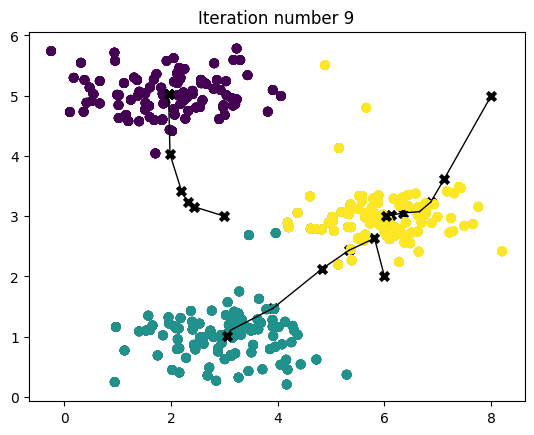

In [17]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="3"></a>
## 3 - Random initialization

示例数据集的初始质心分配是设计成您将看到与 Figure 1 相同的图形。在实践中，初始化质心的一个好策略是从训练集中选择随机的样本。

在本练习的这一部分，您应该了解如何实现 kMeans_init_centroids 函数。
* 代码首先随机打乱样本的索引（使用 `np.random.permutation()`）。
* 然后，它基于索引的随机排列选择前 $K$ 个样本。
    * 这样可以随机选择样本，而不会有选择同一个样本两次的风险。

**Note**: You do not need to make implement anything for this part of the exercise.

In [19]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

<a name="4"></a>
## 4 - Image compression with K-means

在本练习中，您将应用 K-means 算法进行图像压缩。

* 在图像的直接 24 位颜色表示中image$^{2}$，每个像素表示为三个 8 位无符号整数（范围从 0 到 255），它们指定了红色、绿色和蓝色的强度值。这种编码通常称为 RGB 编码。
* 我们的图像包含数千种颜色，本练习的这一部分将把颜色数量减少到 16 种颜色。
* 通过进行这种减少，可以以有效的方式表示（压缩）照片。
* 具体来说，您只需要存储 16 种选择的颜色的 RGB 值，对于图像中的每个像素，您现在只需要存储该位置的颜色的索引（仅需要 4 位来表示 16 种可能性）。

在本部分中，您将使用 K-means 算法选择用于表示压缩图像的 16 种颜色。
* 具体来说，您将把原始图像中的每个像素都视为数据样本，并使用 K-means 算法在三维 RGB 空间中找到最佳的 16 种颜色来对像素进行分组（聚类）。
* 一旦在图像上计算出聚类中心，您将使用这 16 种颜色来替换原始图像中的像素。

<img src="images/figure 2.png" width="500" height="500">

$^{2}$<sub>本练习中使用的照片属于 Frank Wouters，并在其许可下使用。</sub>

<a name="4.1"></a>
### 4.1 Dataset

**Load image**

首先，您将使用 matplotlib 读取原始图像，如下所示。

In [20]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

**Visualize image**

You can visualize the image that was just loaded using the code below.

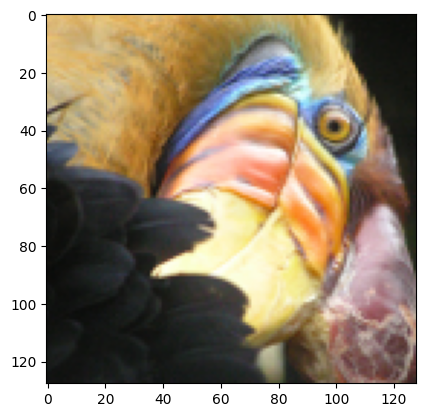

In [21]:
# Visualizing the image
plt.imshow(original_img)

**Check the dimension of the variable**

As always, you will print out the shape of your variable to get more familiar with the data.

In [32]:
print("Shape of original_img is:", original_img.shape)
print(original_img[0,0])

Shape of original_img is: (128, 128, 3)
[0.00336794 0.00276817 0.00158401]



如您所见，这将创建一个三维矩阵 `original_img`，其中
* 前两个索引标识像素位置，
* 第三个索引表示红、绿或蓝。

例如，`original_img[50, 33, 2]` 给出了行 50 和列 33 处像素的蓝色强度。

#### Processing data

要调用 `run_kMeans`，您需要先将矩阵 `original_img` 转换为二维矩阵。

* 下面的代码将重塑矩阵 `original_img`，创建一个大小为 $m \times 3$ 的像素颜色矩阵（其中 $m=16384 = 128\times128$）。

In [23]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

<a name="4.2"></a>
### 4.2 K-Means on image pixels

Now, run the cell below to run K-Means on the pre-processed image.

In [41]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 32                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

[16379  4878  8449 ...    88 11597 16338]
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [42]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [26 14 14 14 26]


<a name="4.3"></a>
### 4.3 Compress the image


找到顶部 $K=16$ 颜色来表示图像后，您现在可以使用 `find_closest_centroids` 函数将每个像素位置分配给其最近的质心。
* 这样可以使用每个像素的质心分配来表示原始图像。
* 请注意，您已经显着减少了描述图像所需的位数。
    * 原始图像对于 $128\times128$ 个像素位置中的每一个都需要 24 位，导致总大小为 $128 \times 128 \times 24 = 393,216$ 位。
    * 新表示需要一些开销存储，形式为 16 种颜色的字典，每种颜色都需要 24 位，但图像本身只需要每个像素位置 4 位。
    * 因此，使用的最终位数为 $16 \times 24 + 128 \times 128 \times 4 = 65,920$ 位，这相当于将原始图像压缩了约 6 倍。

In [43]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Finally, you can view the effects of the compression by reconstructing
the image based only on the centroid assignments. 
* Specifically, you can replace each pixel location with the mean of the centroid assigned to
it. 
* Figure 3 shows the reconstruction we obtained. Even though the resulting image retains most of the characteristics of the original, we also see some compression artifacts.

<img src="images/figure 3.png" width="700" height="700">


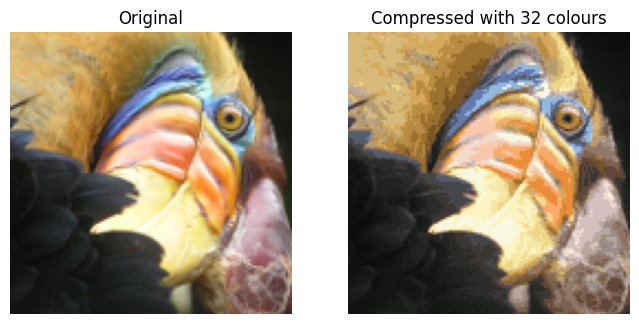

In [44]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()